Load Libraries:

In [21]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM , GRU

Load and Merge Datasets:

In [4]:
def load_csv_file(path,name):
    data  = pd.read_csv(path, encoding='utf-16')
    try:
        data = data.drop(['<TICKER>', '<COl12>', '<COl13>','<LAST>'], axis=1)
    except KeyError:
        pass
    if name != "IRX6XTPI0009.csv":
        columns= list(data.columns)
        for column in columns:
            if  column != "<DTYYYYMMDD>":
                data.rename(columns={column: column+"_"+name[:-4]}, inplace=True)
    return data

In [5]:
def get_files(directory_path):
    dataset = None
    files_names = os.listdir(directory_path)
    for i,files_name in enumerate(files_names):
        path = directory_path+files_name
        data= load_csv_file(path,files_name)
        if i ==0:
            dataset = data
        else:
            dataset = dataset.merge(data, how='outer',sort=True, on='<DTYYYYMMDD>')
    dataset = dataset[dataset['<DTYYYYMMDD>'] >= 20210522]
    dataset = dataset.dropna()
    dataset = dataset.reset_index(drop=True)
    
    return dataset

Create Labels:

In [6]:
def create_labels(data):
    close = data['<CLOSE>']
    labels = []
    print(len(close))
    for i in range(len(close)):
        if(i!=len(close)-1):
            diff = close[i+1] - close[i]
        else:
            diff = (close[i] - data['<OPEN>'][i] )
        if diff > 0:
            labels.append(1)
        else:
            labels.append(0)
    return np.array(labels) 

In [7]:
dataset = get_files("dataset/")

dataset

,<DTYYYYMMDD>,<OPEN>_IRX6XAFF0005,<HIGH>_IRX6XAFF0005,<LOW>_IRX6XAFF0005,<CLOSE>_IRX6XAFF0005,<VOL>_IRX6XAFF0005,<OPENINT>_IRX6XAFF0005,<OPENINT>.1_IRX6XAFF0005,<OPENINT>.2_IRX6XAFF0005,<OPEN>_IRX6XALS0002,...,<OPENINT>.1_IRXZXTRI0006,<OPENINT>.2_IRXZXTRI0006,<OPEN>_IRXZXWDI0007,<HIGH>_IRXZXWDI0007,<LOW>_IRXZXWDI0007,<CLOSE>_IRXZXWDI0007,<VOL>_IRXZXWDI0007,<OPENINT>_IRXZXWDI0007,<OPENINT>.1_IRXZXWDI0007,<OPENINT>.2_IRXZXWDI0007
0,20210522,1653220.0,1653220.0,1631080.0,1631080.0,3.140847e+09,1.542891e+13,171043.0,1.218888e+11,2336960.0,...,1412.0,28093928.57,138.1,138.1,137.6,137.6,35916.0,1.126829e+09,45.0,6578936.37
1,20210523,1623890.0,1623890.0,1607280.0,1607280.0,2.736873e+09,1.429308e+13,195077.0,1.200775e+11,2289950.0,...,856.0,27433098.31,137.6,137.6,137.3,137.3,22722.0,7.100625e+08,23.0,6562351.39
2,20210524,1603870.0,1603870.0,1591260.0,1591260.0,3.100361e+09,1.610564e+13,252943.0,1.188583e+11,2253200.0,...,1742.0,26075617.06,137.3,137.3,137.0,137.0,18505.0,5.768379e+08,30.0,6548990.06
3,20210525,1590940.0,1601750.0,1600280.0,1600280.0,3.828842e+09,2.090582e+13,349959.0,1.194969e+11,2248870.0,...,4260.0,25439980.49,137.0,137.0,136.8,136.8,15680.0,4.877734e+08,24.0,6537687.87
4,20210526,1600910.0,1606120.0,1603500.0,1603500.0,3.187572e+09,1.646125e+13,389162.0,1.197366e+11,2267610.0,...,6566.0,26428508.30,136.7,136.7,136.5,136.5,18479.0,5.738469e+08,55.0,6524388.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,20220516,2005940.0,2017710.0,2017710.0,2017710.0,1.014889e+10,5.205224e+13,798234.0,1.701319e+11,2996210.0,...,3594.0,26850275.21,0.0,141.8,141.8,141.8,0.0,0.000000e+00,0.0,6780641.46
234,20220517,2026770.0,2041520.0,2038090.0,2038090.0,1.023927e+10,5.180431e+13,854852.0,1.718504e+11,3005480.0,...,2540.0,26978077.81,145.2,148.5,146.5,146.5,804823.0,2.630652e+10,3090.0,6537218.59
235,20220518,2036670.0,2036670.0,2021360.0,2021360.0,8.283025e+09,4.102303e+13,933043.0,1.704382e+11,3036050.0,...,2462.0,25962391.33,147.2,147.9,145.8,145.8,930406.0,3.027099e+10,6257.0,6507050.49
236,20220521,2016250.0,2016250.0,2006790.0,2006790.0,8.136843e+09,4.053541e+13,590090.0,1.691946e+11,3012740.0,...,2423.0,26954491.62,140.4,141.0,139.8,139.8,1423015.0,4.438751e+10,2861.0,6238516.65


In [9]:
labels = create_labels(dataset)
labels

238


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1])

Preprocess Data:

In [8]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))
dataset_normal = pd.DataFrame(min_max_scaler.fit_transform(dataset))
dataset_normal

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0.0000,0.132815,0.106970,0.114131,0.114131,0.065825,0.022256,0.000000,0.057187,0.110956,...,0.098845,0.426371,0.717030,0.396570,0.408342,0.408342,0.004012,0.003346,0.000784,0.408090
1,0.0001,0.091317,0.064284,0.080904,0.080904,0.032470,0.010346,0.018245,0.023006,0.051743,...,0.059923,0.391594,0.714434,0.391211,0.405049,0.405049,0.002538,0.002109,0.000400,0.404282
2,0.0002,0.062991,0.035147,0.058539,0.058539,0.062482,0.029353,0.062175,0.000000,0.005454,...,0.121946,0.320155,0.712876,0.387996,0.401756,0.401756,0.002067,0.001713,0.000522,0.401214
3,0.0003,0.044696,0.032062,0.071131,0.071131,0.122629,0.079689,0.135824,0.012051,0.000000,...,0.298215,0.286704,0.711319,0.384780,0.399561,0.399561,0.001752,0.001448,0.000418,0.398619
4,0.0004,0.058803,0.038422,0.075627,0.075627,0.069683,0.033082,0.165586,0.016573,0.023604,...,0.459643,0.338726,0.709761,0.381565,0.396268,0.396268,0.002064,0.001704,0.000958,0.395565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,0.9994,0.631875,0.637438,0.653906,0.653906,0.644444,0.406302,0.476133,0.967571,0.941329,...,0.251593,0.360922,0.000000,0.436227,0.454446,0.454446,0.000000,0.000000,0.000000,0.454407
234,0.9995,0.661347,0.672090,0.682359,0.682359,0.651907,0.403702,0.519115,1.000000,0.953005,...,0.177809,0.367648,0.753894,0.508039,0.506037,0.506037,0.089910,0.078120,0.053805,0.398511
235,0.9996,0.675354,0.665032,0.659002,0.659002,0.490389,0.290646,0.578474,0.973352,0.991510,...,0.172349,0.314197,0.764278,0.501608,0.498353,0.498353,0.103940,0.089893,0.108950,0.391584
236,0.9999,0.646462,0.635313,0.638661,0.638661,0.478319,0.285532,0.318120,0.949884,0.962150,...,0.169618,0.366407,0.728972,0.427653,0.432492,0.432492,0.158971,0.131814,0.049817,0.329921


Batch Data:

In [10]:
def create_database(dataset,labels,days=7):
    X = []
    y = []
    for i in range(days, len(dataset)):
        X.append(dataset.iloc[i - days : i])
        y.append(labels[i])
    X = np.array(X)
    y = np.array(y)
    return np.array(X),np.array(y).astype("int")

In [11]:
days = 15
X,y = create_database(dataset_normal,labels,days = days)
print(X.shape)

(223, 15, 129)


In [12]:
def train_validation_test_split(X,Y,have_validation=False):
    # split data to two dataset contain train_validation and test 
    X_train_validation, X_test, y_train_validation, y_test = train_test_split(X,Y,test_size=0.20,random_state=17,shuffle=True)
    if have_validation == True:
        X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation,y_train_validation,test_size=0.125,random_state=17,shuffle=True)
        return X_train, X_validation,X_test, y_train, y_validation,y_test
    return X_train_validation,X_test,y_train_validation,y_test

In [13]:
def calculate_conf_matrix(model,predictions,y_test):
    res = tf.math.confusion_matrix(y_test,predictions)
    return res

In [14]:
def print_plots(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [15]:
X_train, X_validation,X_test, y_train, y_validation,y_test= train_validation_test_split(X,y,have_validation=True)

Question 2:

LSTM:

In [34]:
def LSTM_model(unit_num, dropout_num=0.1,input_shape=(7,145)):
  #  Initialising the RNN
  model= Sequential()

  # Adding first LSTM layer and some dropout Dropout regularisation
  model.add(LSTM(units=unit_num, activation='relu', input_shape=input_shape))
  model.add(Dropout(rate=dropout_num))

  model.add(keras.layers.Dense(1, activation='sigmoid')) #Output layer
    
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.binary_crossentropy, metrics=["accuracy"])

  model.summary()

  return model

In [44]:

model = LSTM_model(8,dropout_num=0.1,input_shape=(X_train.shape[1],X_train.shape[2]))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 8)                 4416      
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,425
Trainable params: 4,425
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Fitting the model to the Training set
history=model.fit(X_train,y_train,epochs=150,batch_size=1 ,validation_data=(X_validation,y_validation))

Epoch 1/150
155/155 [==============================] - 4s 13ms/step - loss: 0.7925 - accuracy: 0.4452 - val_loss: 0.6948 - val_accuracy: 0.5217
Epoch 2/150
155/155 [==============================] - 2s 12ms/step - loss: 0.6927 - accuracy: 0.5419 - val_loss: 0.6869 - val_accuracy: 0.6087
Epoch 3/150
155/155 [==============================] - 1s 7ms/step - loss: 0.7219 - accuracy: 0.5742 - val_loss: 0.6872 - val_accuracy: 0.5652
Epoch 4/150
155/155 [==============================] - 1s 6ms/step - loss: 0.6868 - accuracy: 0.5806 - val_loss: 0.6864 - val_accuracy: 0.5652
Epoch 5/150
155/155 [==============================] - 1s 8ms/step - loss: 0.6857 - accuracy: 0.5806 - val_loss: 0.6856 - val_accuracy: 0.5652
Epoch 6/150
155/155 [==============================] - 1s 8ms/step - loss: 0.6851 - accuracy: 0.5806 - val_loss: 0.6851 - val_accuracy: 0.5652
Epoch 7/150
155/155 [==============================] - 1s 6ms/step - loss: 0.6841 - accuracy: 0.5806 - val_loss: 0.6843 - val_accuracy: 0.56

In [47]:
results = model.evaluate(X_test,y_test,batch_size=1, verbose = 0)
print('test loss, test acc:', results)

predictions=[]
from sklearn.metrics import accuracy_score

pred = model.predict(X_test, verbose = 0)


for i in pred:
    if(i>0.5):
        predictions.append(1)
    else:
        predictions.append(0)
    
    
print(accuracy_score(predictions, y_test))
print(calculate_conf_matrix(model,predictions,y_test))

test loss, test acc: [0.6427756547927856, 0.6222222447395325]
0.6222222222222222
tf.Tensor(
[[ 2 17]
 [ 0 26]], shape=(2, 2), dtype=int32)


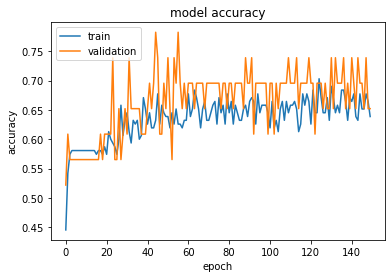

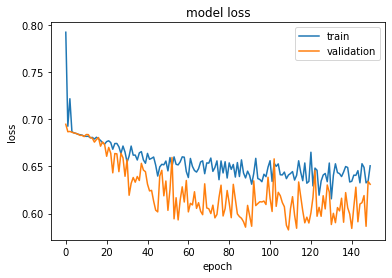

In [48]:
print_plots(history)

GRU:

In [19]:
def GRU_model(unit_num, dropout_num=0.1,input_shape=(7,145)):
  #  Initialising the RNN
  model= Sequential()

  # Adding first LSTM layer and some dropout Dropout regularisation
  model.add(GRU(units=unit_num, activation='relu', input_shape=input_shape))
  model.add(Dropout(rate=dropout_num))

  model.add(keras.layers.Dense(1, activation='sigmoid')) #Output layer
    
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.binary_crossentropy, metrics=["accuracy"])

  model.summary()

  return model

In [ ]:
model = GRU_model(64,dropout_num=0.1,input_shape=(X_train.shape[1],X_train.shape[2]))

In [ ]:
# Fitting the model to the Training set
history=model.fit(X_train,y_train,epochs=150,batch_size=1 ,validation_data=(X_validation,y_validation))

In [ ]:
results = model.evaluate(X_test,y_test,batch_size=1, verbose = 0)
print('test loss, test acc:', results)

predictions=[]
from sklearn.metrics import accuracy_score

pred = model.predict(X_test, verbose = 0)


for i in pred:
    if(i>0.5):
        predictions.append(1)
    else:
        predictions.append(0)
    
    
print(accuracy_score(predictions, y_test))
print(calculate_conf_matrix(model,predictions,y_test))

In [ ]:
print_plots(history)

Question 3:

LSTM_Stack

In [16]:
def LSTM_stack_model(unit_num, dropout_num=0.1, return_sequences_bool=True,input_shape=(7,145)):
  #  Initialising the RNN
  model= Sequential()


  # Adding fourth LSTM layer and some dropout Dropout regularisation
  model.add(LSTM(units=unit_num[0],return_sequences=return_sequences_bool, activation='tanh'))
  model.add(Dropout(rate=dropout_num))

   # Adding fourth LSTM layer and some dropout Dropout regularisation
  model.add(LSTM(units=unit_num[1],return_sequences=return_sequences_bool, activation='tanh'))
  model.add(Dropout(rate=dropout_num))

   # Adding fourth LSTM layer and some dropout Dropout regularisation
  model.add(LSTM(units=unit_num[2],return_sequences=return_sequences_bool, activation='tanh'))
  model.add(Dropout(rate=dropout_num))

   # Adding fourth LSTM layer and some dropout Dropout regularisation
  model.add(LSTM(units=unit_num[3],return_sequences=return_sequences_bool, activation='tanh'))
  model.add(Dropout(rate=dropout_num))

  # Adding fifth LSTM layer and some dropout Dropout regularisation
  model.add(LSTM(units=unit_num[4], activation='tanh'))
  model.add(Dropout(rate=dropout_num))

  model.add(keras.layers.Dense(1, activation='sigmoid')) #Output layer
    
  model.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"])


  return model

In [17]:
model = LSTM_stack_model([32,32,32,32,32],dropout_num=0.1,input_shape=(X_train.shape[1],X_train.shape[2]))

In [18]:
# Fitting the model to the Training set
history=model.fit(X_train,y_train,epochs=150 ,validation_data=(X_validation,y_validation))

Epoch 1/150
5/5 [==============================] - 17s 700ms/step - loss: 0.6911 - accuracy: 0.5871 - val_loss: 0.6855 - val_accuracy: 0.5652
Epoch 2/150
5/5 [==============================] - 0s 57ms/step - loss: 0.6809 - accuracy: 0.5806 - val_loss: 0.6842 - val_accuracy: 0.5652
Epoch 3/150
5/5 [==============================] - 0s 66ms/step - loss: 0.6768 - accuracy: 0.5806 - val_loss: 0.6838 - val_accuracy: 0.5652
Epoch 4/150
5/5 [==============================] - 0s 64ms/step - loss: 0.6828 - accuracy: 0.5806 - val_loss: 0.6829 - val_accuracy: 0.5652
Epoch 5/150
5/5 [==============================] - 0s 89ms/step - loss: 0.6796 - accuracy: 0.5806 - val_loss: 0.6805 - val_accuracy: 0.5652
Epoch 6/150
5/5 [==============================] - 0s 65ms/step - loss: 0.6780 - accuracy: 0.5806 - val_loss: 0.6798 - val_accuracy: 0.5652
Epoch 7/150
5/5 [==============================] - 0s 59ms/step - loss: 0.6808 - accuracy: 0.5806 - val_loss: 0.6775 - val_accuracy: 0.5652
Epoch 8/150
5/5 [=

In [19]:
results = model.evaluate(X_test,y_test,batch_size=1, verbose = 0)
print('test loss, test acc:', results)

predictions=[]
from sklearn.metrics import accuracy_score

pred = model.predict(X_test, verbose = 0)


for i in pred:
    if(i>0.5):
        predictions.append(1)
    else:
        predictions.append(0)
    
    
print(accuracy_score(predictions, y_test))
print(calculate_conf_matrix(model,predictions,y_test))

test loss, test acc: [1.0011063814163208, 0.5777778029441833]
0.5777777777777777
tf.Tensor(
[[ 8 11]
 [ 8 18]], shape=(2, 2), dtype=int32)


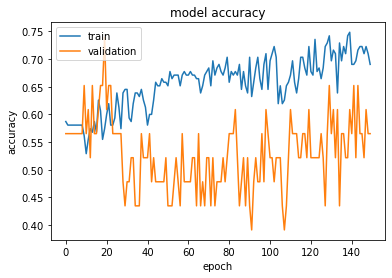

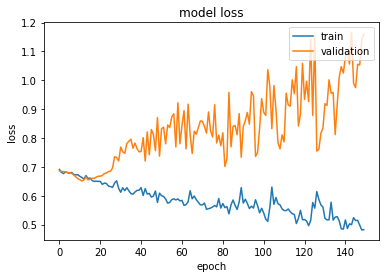

In [20]:
print_plots(history)

Stack GRU:


In [40]:
def GRU_stack_model(unit_num, dropout_num=0.1, return_sequences_bool=True,input_shape=(7,145)):
  #  Initialising 
  model= Sequential()

  model.add(GRU(units=unit_num[0],return_sequences=return_sequences_bool, activation='tanh'))
  model.add(Dropout(rate=dropout_num))



  model.add(GRU(units=unit_num[1], activation='tanh'))
  model.add(Dropout(rate=dropout_num))

  model.add(keras.layers.Dense(1, activation='sigmoid')) #Output layer
    
  model.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"])


  return model

In [41]:
model = GRU_stack_model([32,32],dropout_num=0.1,input_shape=(X_train.shape[1],X_train.shape[2]))

In [42]:
# Fitting the model to the Training set
history=model.fit(X_train,y_train,epochs=150 ,batch_size=1 ,validation_data=(X_validation,y_validation))

Epoch 1/150
155/155 [==============================] - 14s 29ms/step - loss: 0.7101 - accuracy: 0.5548 - val_loss: 0.6773 - val_accuracy: 0.5652
Epoch 2/150
155/155 [==============================] - 2s 16ms/step - loss: 0.7116 - accuracy: 0.5226 - val_loss: 0.6804 - val_accuracy: 0.6957
Epoch 3/150
155/155 [==============================] - 2s 15ms/step - loss: 0.6851 - accuracy: 0.5613 - val_loss: 0.7702 - val_accuracy: 0.4348
Epoch 4/150
155/155 [==============================] - 2s 14ms/step - loss: 0.6916 - accuracy: 0.5355 - val_loss: 0.6759 - val_accuracy: 0.5652
Epoch 5/150
155/155 [==============================] - 2s 14ms/step - loss: 0.7055 - accuracy: 0.5226 - val_loss: 0.6830 - val_accuracy: 0.5652
Epoch 6/150
155/155 [==============================] - 2s 14ms/step - loss: 0.6935 - accuracy: 0.5355 - val_loss: 0.6665 - val_accuracy: 0.6087
Epoch 7/150
155/155 [==============================] - 2s 12ms/step - loss: 0.6853 - accuracy: 0.5935 - val_loss: 0.6620 - val_accuracy

In [38]:
results = model.evaluate(X_test,y_test,batch_size=1, verbose = 0)
print('test loss, test acc:', results)

predictions=[]
from sklearn.metrics import accuracy_score

pred = model.predict(X_test, verbose = 0)


for i in pred:
    if(i>0.5):
        predictions.append(1)
    else:
        predictions.append(0)
    
    
print(accuracy_score(predictions, y_test))
print(calculate_conf_matrix(model,predictions,y_test))

test loss, test acc: [2.317180633544922, 0.4888888895511627]
0.4888888888888889
tf.Tensor(
[[ 8 11]
 [12 14]], shape=(2, 2), dtype=int32)


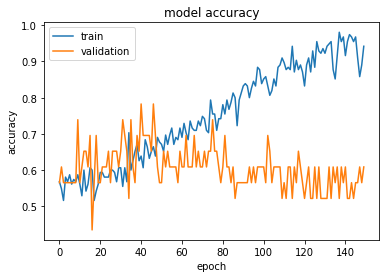

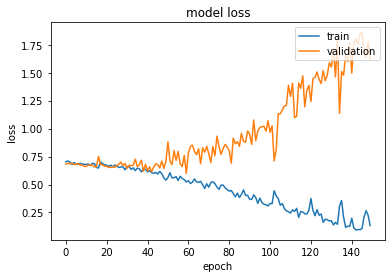

In [39]:
print_plots(history)